In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
orig_data = np.loadtxt('diabetes.csv', delimiter=',', skiprows=1)

In [21]:
# Min Max Scaler function to pre process the data

def minmax_scaler(data,minval, maxval):
    dataminvals = np.min(data, axis=0)
    datamaxvals = np.max(data, axis=0)
    return ((data - dataminvals) / (datamaxvals - dataminvals))*(maxval - minval) + minval 
    

In [22]:
scaled_data = minmax_scaler(orig_data,-1,1)

In [23]:
import numpy as np

class Perceptron:
    def __init__(self, data, learning_rate=0.01, epochs=1000, training_split = 0.7):
        self.weights = np.zeros(data.shape[1]-1)
        self.bias = np.zeros(1)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_split = training_split
        self.data = np.copy(data)
        np.random.shuffle(self.data)
        self.X_train = self.data[:int(training_split*self.data.shape[0]),:-1]
        self.y_train = (self.data[:int(training_split*self.data.shape[0]),-1]).astype(int)
        self.X_test = self.data[int(training_split*self.data.shape[0]):,:-1]
        self.y_test = (self.data[int(training_split*self.data.shape[0]):,-1]).astype(int)
        self.epoch_error_cumulative = np.zeros(self.X_train[0].shape[0])
        self.training_errors = np.zeros(self.epochs)
        self.testing_errors = np.zeros(self.epochs)
        self.training_accuracy = 0
        self.testing_accuracy = 0
           

    def print_weights(self):
        print(self.X_train[0].shape[0])

    def activation_function(self, result):
        return 1 if result >= 0 else -1

    def predict(self, X):
        y_pred = np.dot(X, self.weights) 
        return self.activation_function(y_pred)

    def train(self, learning_rate=0.01, epochs=1000):
        for i in range(self.epochs):
            epoch_error_train = 0
            epoch_error_test = 0

            #train data
            for j in range(self.X_train.shape[0]):
                y_pred = self.predict(self.X_train[j])
                if y_pred != self.y_train[j]:
                    lossflag = 1
                else:
                    lossflag = 0

                # Update weights - Perceptron Learning Rule
                #self.weights += self.learning_rate * (self.y_train[j] - y_pred ) * self.X_train[j]
                self.weights += self.learning_rate * self.y_train[j] * self.X_train[j] * lossflag

                if(y_pred != self.y_train[j]):
                    epoch_error_train += 1
            
            #test data
            for j in range(self.X_test.shape[0]):
                y_pred_test = self.predict(self.X_test[j])

                if(y_pred_test != self.y_test[j]):
                    epoch_error_test += 1

            #add epoch errors to error results
            self.training_errors[i] = epoch_error_train/self.X_train.shape[0]
            self.testing_errors[i] = epoch_error_test/self.X_test.shape[0]
            self.training_accuracy = 1-(epoch_error_train/self.X_train.shape[0])
            self.testing_accuracy = 1-epoch_error_test/self.X_test.shape[0]
            

        return self.weights, self.training_errors, self.testing_errors, self.training_accuracy, self.testing_accuracy

Training Accuracy:  0.6815642458100559
Testing Accuracy:  0.7445887445887446
Weights:  [ 0.00588235  0.04512563 -0.00655738  0.00222222 -0.00919622  0.02739195
  0.00393681  0.02      ]


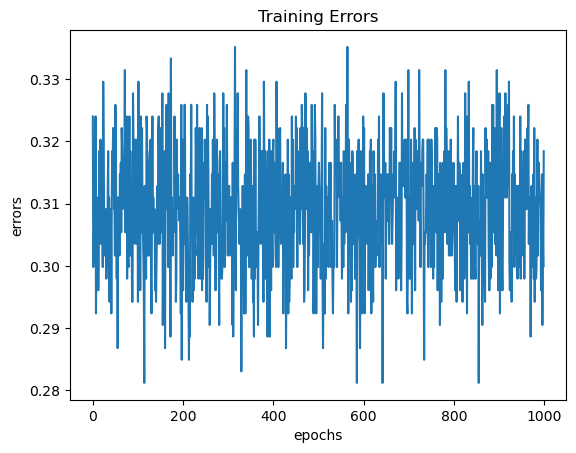

In [24]:
p = Perceptron(scaled_data, learning_rate=0.01, epochs=1000, training_split = 0.7)
w,e,t, train_acc, test_acc = p.train()
print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Weights: ", w)
plt.title("Training Errors")
plt.plot(e)
plt.xlabel('epochs')
plt.ylabel('errors')
plt.show()


Weights:  [ 0.00588235  0.04512563 -0.00655738  0.00222222 -0.00919622  0.02739195
  0.00393681  0.02      ]


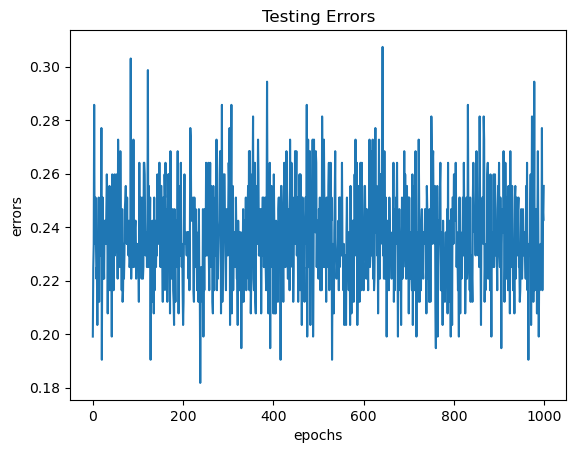

In [25]:
print("Weights: ", w)
plt.title("Testing Errors")
plt.plot(t)
plt.xlabel('epochs')
plt.ylabel('errors')
plt.show()